In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


### Başlangıçta Eksik Veri Analizi

Bu adımda, veri kümesinin başlangıç durumu kontrol edilerek eksik veri olup olmadığına bakılır. İlk başta eksik veri yoktur. Ancak, bazı veri manipülasyonları ve işlemler sonrasında eksik veriler ortaya çıkabilir.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score


# Function to load dataset from Kaggle's input directory
def load_data():
    file_path = "/kaggle/input/diabetes-dataset/diabetes.csv"  # Adjust this path to the actual dataset in the Kaggle input folder
    return pd.read_csv(file_path)

In [33]:
# Function to visualize missing data
def visualize_missing_data(data, cmap="viridis"):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap=cmap, yticklabels=False)
    plt.title("Eksik Veri Görselleştirme")
    plt.show()

### Farklı İmputasyon Yöntemleri Sonrası

Bu adımda, eksik veriler farklı imputasyon teknikleriyle doldurulur:
1. **Ortalama ile Doldurma**: Her sütunun ortalaması ile eksik değerler tamamlanır.
2. **Ortanca ile Doldurma**: Her sütunun ortanca değeri ile eksik veriler tamamlanır.
3. **Mod ile Doldurma**: Her sütunun mod değeri kullanılarak eksik veriler tamamlanır.
4. **KNN Imputasyonu**: K-Nearest Neighbors algoritması kullanılarak eksik veriler tahmin edilip doldurulur.


In [34]:
# Function to simulate missing data for testing purposes
def simulate_missing_data(data, seed=42):
    np.random.seed(seed)
    data_simulated = data.copy()
    for col in data_simulated.select_dtypes(include=['float64', 'int64']).columns:
        missing_count = np.random.randint(5, 15)
        missing_indices = np.random.choice(data_simulated.index, missing_count, replace=False)
        data_simulated.loc[missing_indices, col] = np.nan
    return data_simulated

# Function to apply different imputation methods
def impute_missing_data(data_simulated):
    # Imputation methods
    data_filled_mean = data_simulated.fillna(data_simulated.mean())
    data_filled_median = data_simulated.fillna(data_simulated.median())
    data_filled_mode = data_simulated.fillna(data_simulated.mode().iloc[0])
    
    # KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_filled_knn = pd.DataFrame(knn_imputer.fit_transform(data_simulated), columns=data_simulated.columns)
    
    return data_filled_mean, data_filled_median, data_filled_mode, data_filled_knn

# Function to plot boxplots before and after imputation
def plot_boxplots(data_before, data_after, title_before="Eksik Verilerden Önce", title_after="KNN İmputation Sonrası"):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_before.select_dtypes(include=['float64', 'int64']))
    plt.title(title_before)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_after.select_dtypes(include=['float64', 'int64']))
    plt.title(title_after)
    plt.show()

def evaluate_classification_performance(original_data, imputed_data, target_column='Outcome'):
    # Separate features and target column
    X_original = original_data.drop(columns=[target_column])
    y_original = original_data[target_column]
    X_imputed = imputed_data.drop(columns=[target_column])
    y_imputed = imputed_data[target_column]

    # Check if target variable is continuous (for regression tasks)
    if y_original.nunique() == 2:  # Binary classification
        # Convert to integers if they are not
        y_original = y_original.astype(int)
        y_imputed = y_imputed.astype(int)

        print("\n### Classification Performance ###")
        
        # Confusion Matrix
        cm = confusion_matrix(y_original, y_imputed)
        print("\nConfusion Matrix:")
        print(cm)

        # Classification Report
        cr = classification_report(y_original, y_imputed)
        print("\nClassification Report:")
        print(cr)

        # Accuracy
        accuracy = accuracy_score(y_original, y_imputed)
        print("\nAccuracy:", accuracy)
    else:  # Regression case
        print("\n### Regression Performance ###")
        
        # Mean Squared Error
        mse = mean_squared_error(y_original, y_imputed)
        print("\nMean Squared Error:", mse)

        # R-squared score
        r2 = r2_score(y_original, y_imputed)
        print("\nR-squared:", r2)

### Başlangıçta Eksik Veri Analizi ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Eksik veri sayıları:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                    

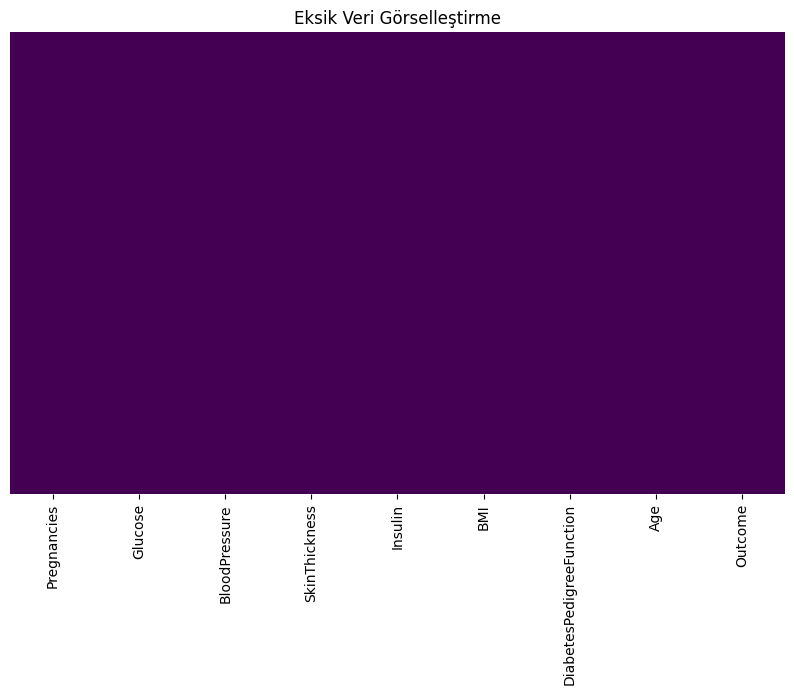


### Simülasyondan Sonra Eksik Veri Analizi ###
Pregnancies                 11
Glucose                      7
BloodPressure                5
SkinThickness                7
Insulin                      7
BMI                          7
DiabetesPedigreeFunction     9
Age                         11
Outcome                      6
dtype: int64


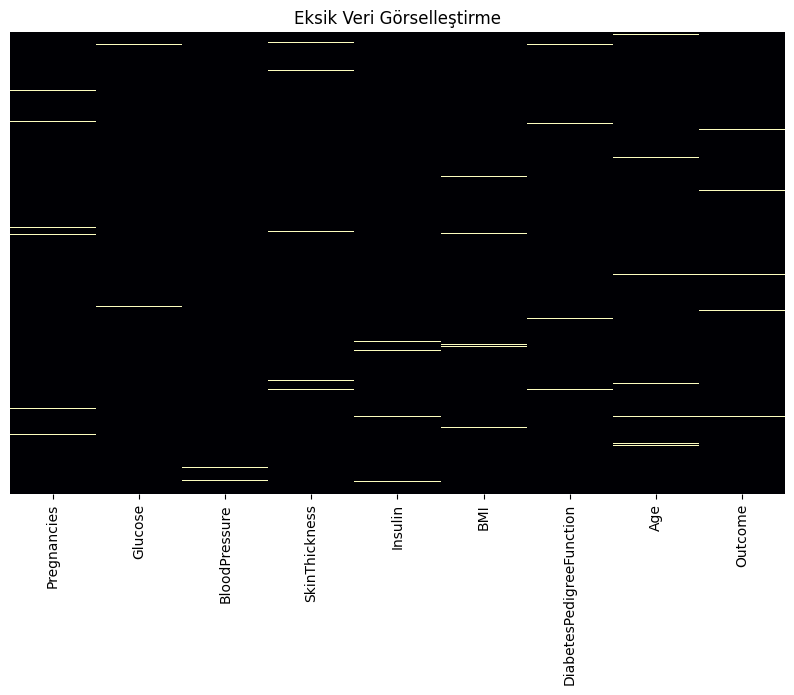


### Farklı İmputasyon Yöntemleri Sonrası ###
Ortalama ile doldurma: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Ortanca ile doldurma: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Mod ile doldurma: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
KNN Imputation ile doldurma: Pregnancies  

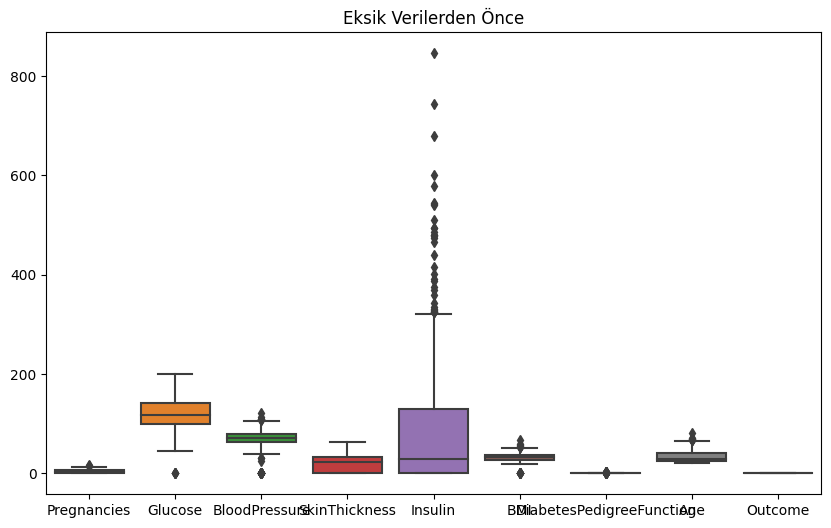

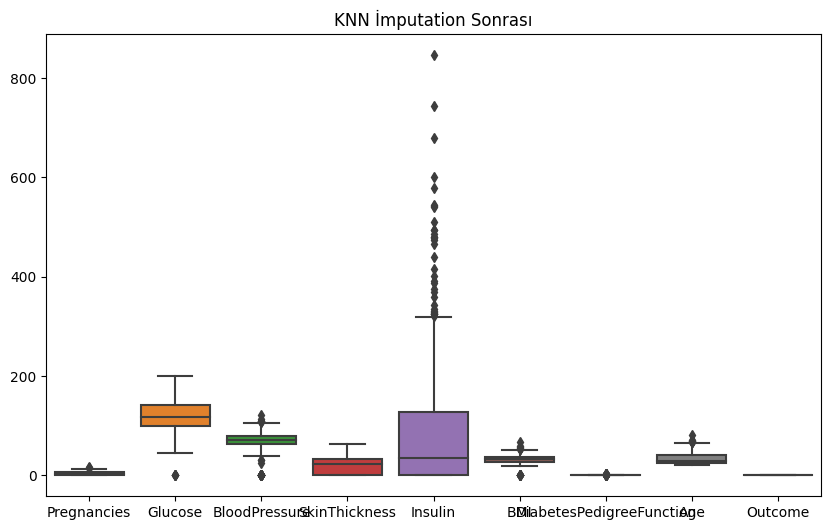


### Classification Performance ###

Confusion Matrix:
[[500   0]
 [  1 267]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768


Accuracy: 0.9986979166666666


In [35]:
# Main execution function
def main():
    # Load dataset directly from Kaggle's input directory
    data = load_data()
    
    # 1. Başlangıçta eksik veri analizi
    print("### Başlangıçta Eksik Veri Analizi ###")
    print(data.info())
    print("\nEksik veri sayıları:\n", data.isnull().sum())
    missing_percentage = data.isnull().mean() * 100
    print("\nEksik veri yüzdeleri:\n", missing_percentage)

    visualize_missing_data(data)

    # 2. Eksik veri simülasyonu
    data_simulated = simulate_missing_data(data)
    
    print("\n### Simülasyondan Sonra Eksik Veri Analizi ###")
    print(data_simulated.isnull().sum())
    visualize_missing_data(data_simulated, cmap="magma")

    # 3. Eksik veri doldurma yöntemleri
    data_filled_mean, data_filled_median, data_filled_mode, data_filled_knn = impute_missing_data(data_simulated)

    print("\n### Farklı İmputasyon Yöntemleri Sonrası ###")
    print("Ortalama ile doldurma:", data_filled_mean.isnull().sum())
    print("Ortanca ile doldurma:", data_filled_median.isnull().sum())
    print("Mod ile doldurma:", data_filled_mode.isnull().sum())
    print("KNN Imputation ile doldurma:", data_filled_knn.isnull().sum()) 
   # 4. Sonuçları görselleştirme
    plot_boxplots(data_simulated, data_filled_knn)

    # 5. Performans değerlendirmesi (sınıflandırma performansı için)
    # Assuming 'data_filled_knn' is your imputed dataset (after KNN imputation)
    evaluate_classification_performance(data, data_filled_knn)

# Run the main function
if __name__ == "__main__":
    main()

Modelin genel doğruluğu ve sınıflandırma metrikleri yüksek çıkıyor. B iimputasyon tekniklerinin ve modelin doğru çalıştığını gösteriyor
Doğruluk:0.99
.


True Negatives (TN): 500
False Positives (FP): 0
False Negatives (FN): 1
True Positives (TP): 267